In [57]:
import re
import json
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import io
import csv
from collections import defaultdict
import matplotlib.pyplot as plt

In [98]:

# Load the dataset
df = pd.read_csv('../past_data/prices_round_2_day_-1.csv', delimiter=';')
df2 = pd.read_csv('../past_data/prices_round_2_day_0.csv', delimiter=';')
df3 = pd.read_csv('../past_data/prices_round_2_day_1.csv', delimiter=';')

# Define a function to calculate the production adjustment based on humidity
def calculate_humidity_effect(humidity):
    # Calculate the deviation from the optimal range
    if humidity < 60:
        deviation = (60 - humidity) // 5
    elif humidity > 80:
        deviation = (humidity - 80) // 5
    else:
        deviation = 0
    
    # Calculate the effect per 12 hours
    effect_per_12_hours = (deviation * 2) /10000

    return effect_per_12_hours

# Apply the function to the humidity column to create a new 'Humidity_Effect' column
df['Humidity_Effect_Per_12_Hours'] = df['HUMIDITY'].apply(calculate_humidity_effect)
df2['Humidity_Effect_Per_12_Hours'] = df2['HUMIDITY'].apply(calculate_humidity_effect)
df3['Humidity_Effect_Per_12_Hours'] = df3['HUMIDITY'].apply(calculate_humidity_effect)
# Calculate the cumulative humidity effect
df['Cumulative_Humidity_Effect'] = df['Humidity_Effect_Per_12_Hours'].cumsum()
df2['Cumulative_Humidity_Effect'] = df2['Humidity_Effect_Per_12_Hours'].cumsum()
df3['Cumulative_Humidity_Effect'] = df3['Humidity_Effect_Per_12_Hours'].cumsum()
# Assuming 'Humidity_Effect' starts at 100%, calculate the cumulative production level
df['Cumulative_Production_Level'] = 100 - df['Cumulative_Humidity_Effect']
df2['Cumulative_Production_Level'] = 100 - df2['Cumulative_Humidity_Effect']
df3['Cumulative_Production_Level'] = 100 - df3['Cumulative_Humidity_Effect']




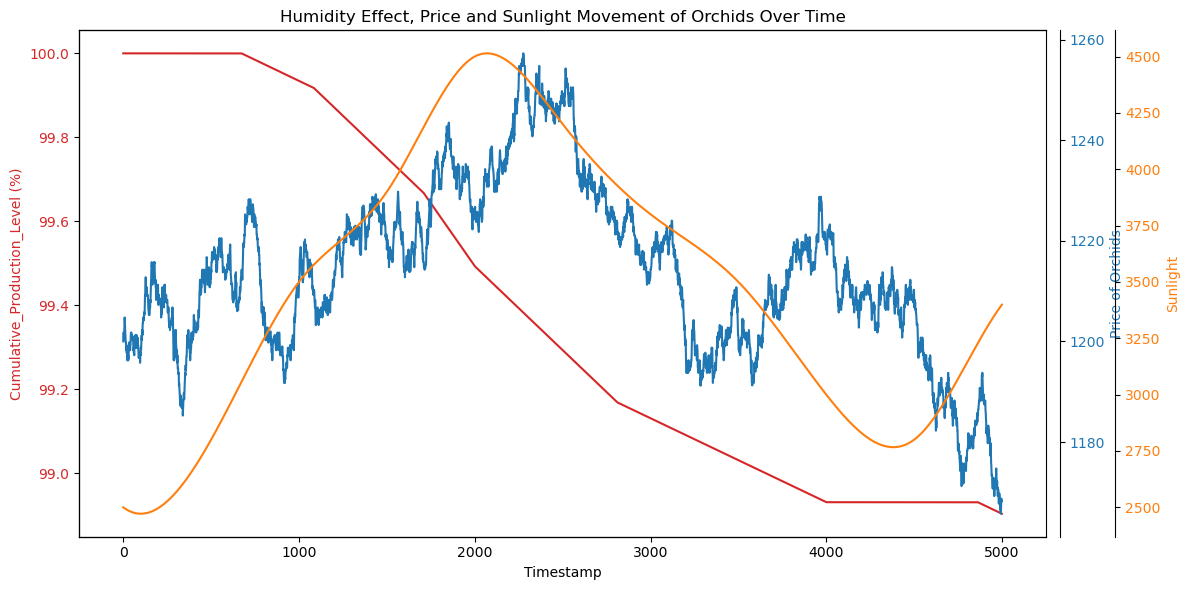

In [103]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Cumulative_Production_Level (%)', color=color)
ax1.plot(df.index, df['Cumulative_Production_Level'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df.index, df['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot
plt.show()

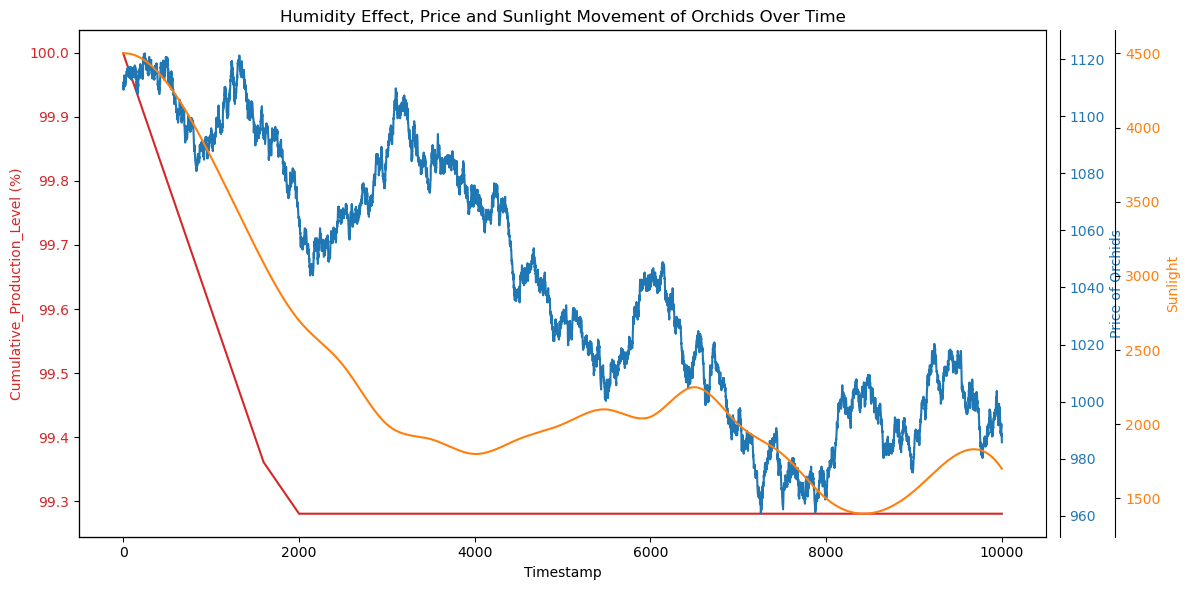

In [100]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns
# df = df[6000:7000]
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Cumulative_Production_Level (%)', color=color)
ax1.plot(df2.index, df2['Cumulative_Production_Level'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df2.index, df2['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df2.index, df2['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot

plt.show()

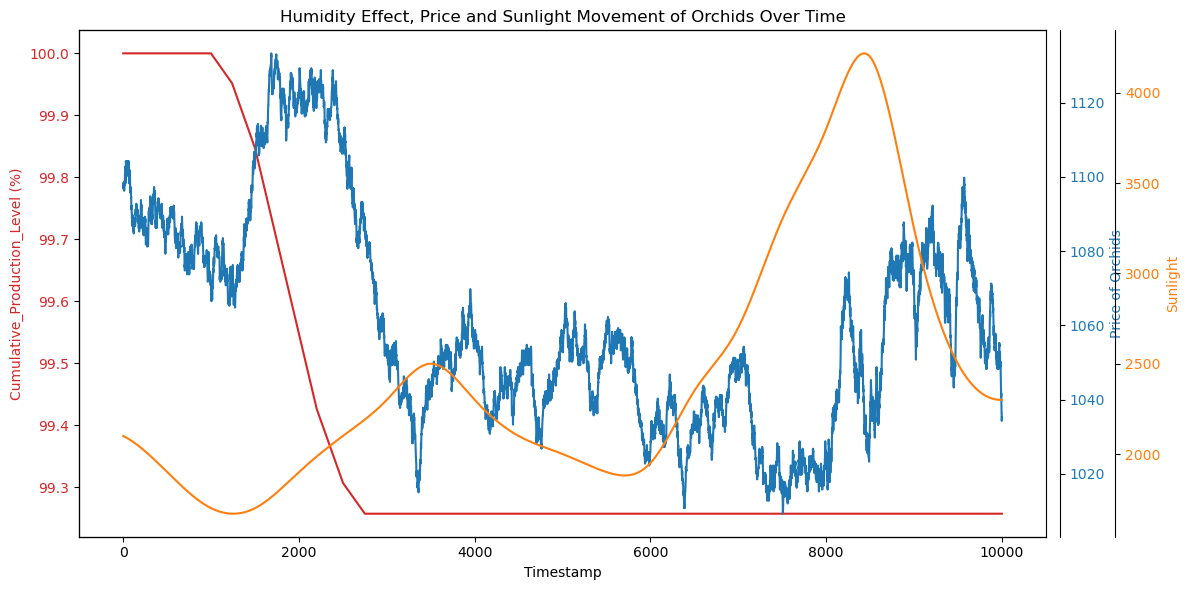

In [101]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns
# df = df[6000:7000]
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Cumulative_Production_Level (%)', color=color)
ax1.plot(df3.index, df3['Cumulative_Production_Level'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df3.index, df3['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df3.index, df3['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot
plt.show()

In [201]:
df = pd.read_csv('../past_data/prices_round_2_day_-1.csv', delimiter=';')
df2 = pd.read_csv('../past_data/prices_round_2_day_0.csv', delimiter=';')
df3 = pd.read_csv('../past_data/prices_round_2_day_1.csv', delimiter=';')
# Define a function to calculate the production adjustment based on humidity
def calculate_humidity_effect(humidity):
    if humidity < 60:
        return 100 - ((60 - humidity) // 5 * 2)
    elif humidity > 80:
        return 100 - ((humidity - 80) // 5 * 2)
    else:
        return 100  # 100% production if within the ideal range

# Apply the function to the humidity column to create a new 'Humidity_Effect' column
df['Humidity_Effect'] = df['HUMIDITY'].apply(calculate_humidity_effect)
df2['Humidity_Effect'] = df2['HUMIDITY'].apply(calculate_humidity_effect)
df3['Humidity_Effect'] = df3['HUMIDITY'].apply(calculate_humidity_effect)

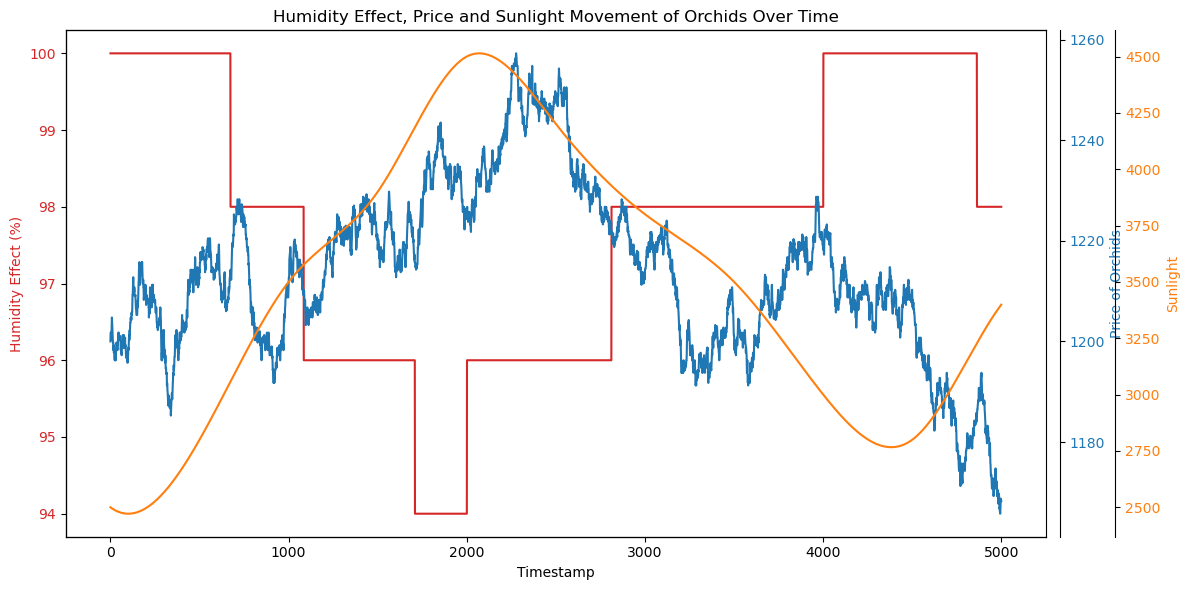

In [202]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns
df = df[:5000]
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Humidity Effect (%)', color=color)
ax1.plot(df.index, df['Humidity_Effect'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df.index, df['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df.index, df['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot
plt.savefig('../analysis/plt1.png', format='png', dpi=300)
plt.show()

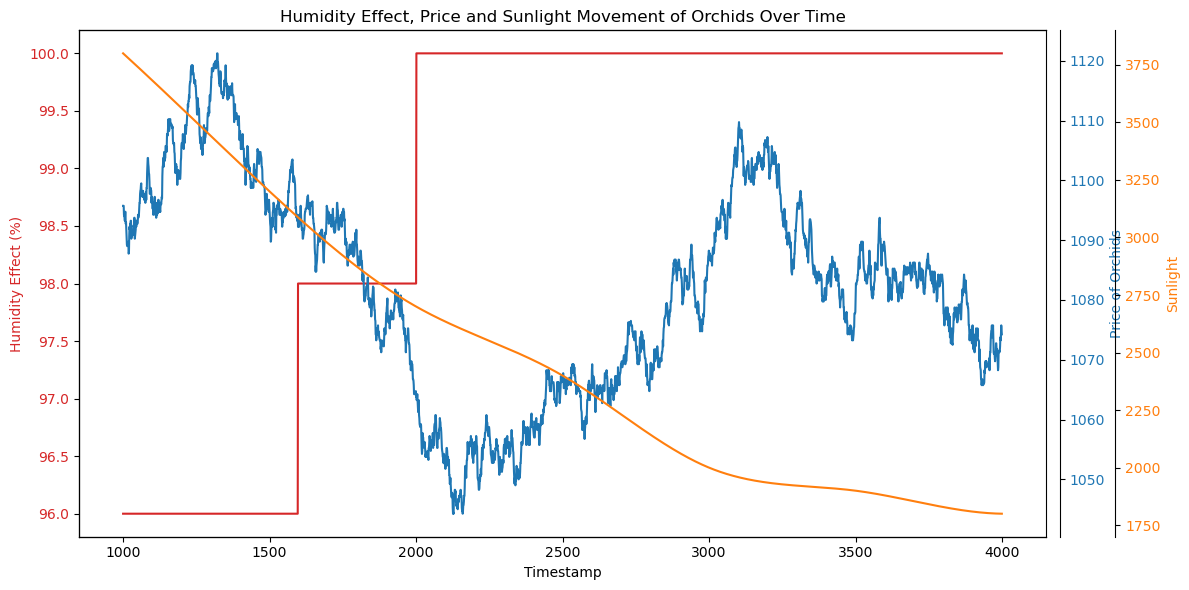

In [191]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns
df2 = df2[1000:4000]
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Humidity Effect (%)', color=color)
ax1.plot(df2.index, df2['Humidity_Effect'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df2.index, df2['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df2.index, df2['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot
plt.savefig('../analysis/plt2.png', format='png', dpi=300)
plt.show()


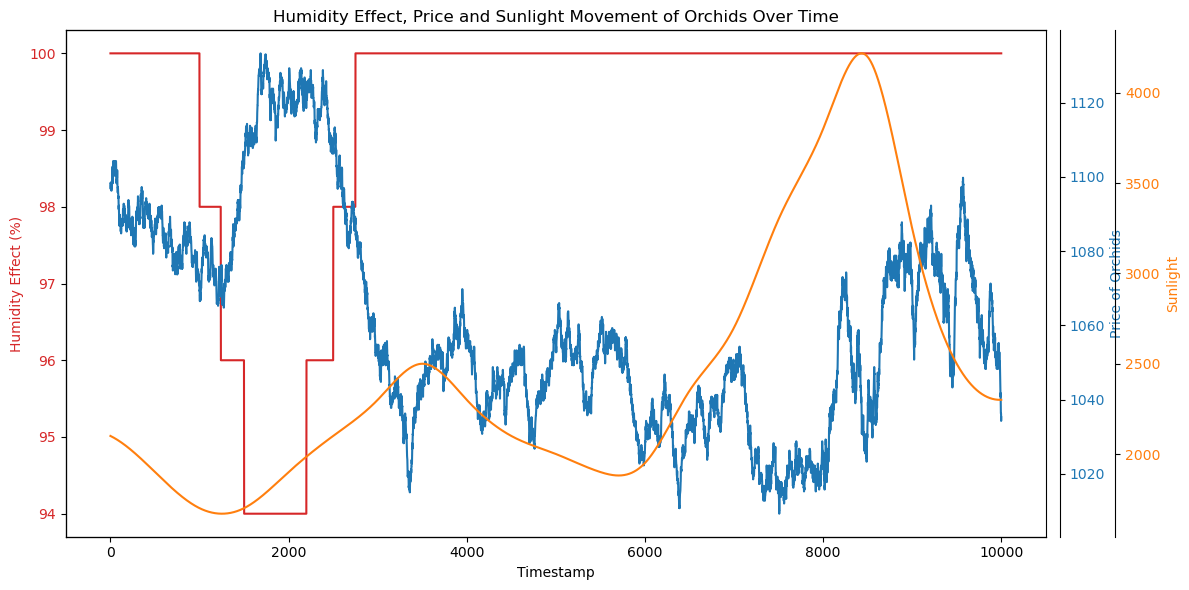

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'Humidity_Effect', 'ORCHIDS', and 'SUNLIGHT' columns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the humidity effect
color = 'tab:red'
ax1.set_xlabel('Timestamp')
ax1.set_ylabel('Humidity Effect (%)', color=color)
ax1.plot(df3.index, df3['Humidity_Effect'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the price movement, and move it a bit to the left
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 10))  # Offset the price axis to the left
color = 'tab:blue'
ax2.set_ylabel('Price of Orchids', color=color)
ax2.plot(df3.index, df3['ORCHIDS'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Create a third y-axis for sunlight, which will remain on the far right
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))  # Keep the sunlight axis to the far right
color = 'tab:orange'
ax3.set_ylabel('Sunlight', color=color)
ax3.plot(df3.index, df3['SUNLIGHT'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

# Adding a title
plt.title('Humidity Effect, Price and Sunlight Movement of Orchids Over Time')

# Ensure the display is correct
fig.tight_layout()

# Show plot
plt.savefig('../analysis/plt3.png', format='png', dpi=300)
plt.show()
